#Implementing Polynomial regression using pytroch

In [23]:
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
# Generating data
X = torch.linspace(-3, 3, 100).view(-1, 1)
y = 3 * X**2 + 2 * X + 1 + 0.5 * torch.randn(X.size())# Quadratic function: 3X^2 + 2X + 0.5 * random value

def polynomial_features(x, degree=2):
  return torch.cat([x**i for i in range(1, degree+1)], dim = 1) # Concatonating the string

degree = 2
X_poly = polynomial_features(X, degree)

In [24]:
#Defining the model, loss and optimizer
model = nn.Linear(degree, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epochs = 1000
l = nn.MSELoss()

# Running and evaluating the model
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(X_poly)
  loss = l(y_pred, y)
  loss.backward()
  optimizer.step()

  if epoch %100 == 0:
    print(f"Epoch: ", epoch, "Loss: ", loss.item())

model.eval()
with torch.no_grad():
  y_pred = model(X_poly)
  loss = l(y_pred, y)

Epoch:  0 Loss:  263.8450012207031
Epoch:  100 Loss:  0.27186980843544006
Epoch:  200 Loss:  0.24619866907596588
Epoch:  300 Loss:  0.24163919687271118
Epoch:  400 Loss:  0.2408282309770584
Epoch:  500 Loss:  0.24068407714366913
Epoch:  600 Loss:  0.24065840244293213
Epoch:  700 Loss:  0.2406538426876068
Epoch:  800 Loss:  0.24065299332141876
Epoch:  900 Loss:  0.2406528890132904


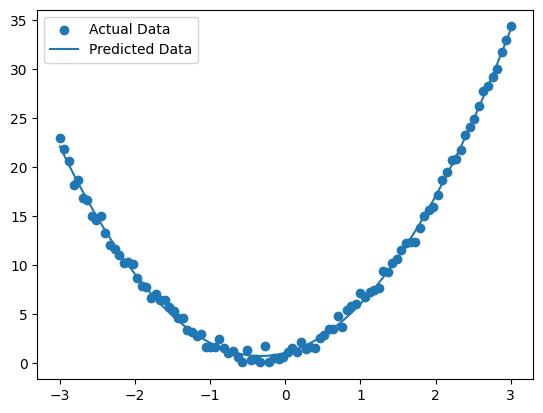

In [25]:
#Plotting the graphs
plt.scatter(X, y, label = 'Actual Data')
plt.plot(X, y_pred, label = "Predicted Data")
plt.legend()
plt.show()

# Implementing polynomial regression with sklearn

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

np.random.seed(42)
# Using same points as before
pr = PolynomialFeatures(degree = 2)
X_pr = pr.fit_transform(X)
lr = LinearRegression()
lr.fit(X_pr, y)
y_pred = lr.predict(X_pr)
mse = mean_squared_error(y, y_pred)
print(f"MSE: ", mse)

MSE:  0.2406528635364648


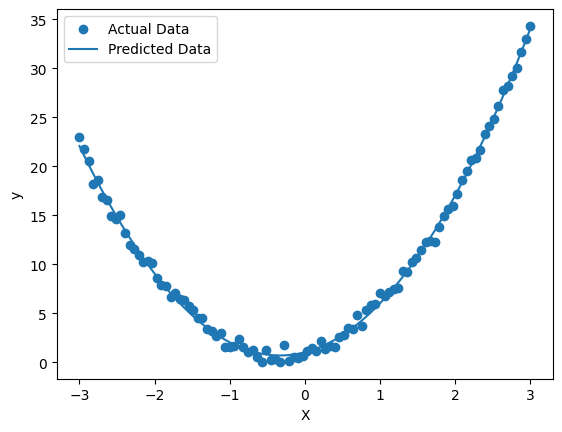

In [27]:
plt.scatter(X, y, label = 'Actual Data')
plt.plot(X, y_pred, label = "Predicted Data")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()